# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from os import listdir
from os.path import isfile, join

In [ ]:
import re

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt

# Testing

In [ ]:
df = pd.read_csv("../Dataset/2_Korea_Bakery_Price.csv")

In [ ]:
df

,Name,price
0,angbutter,4800
1,plain bread,3500
2,jam,1500
3,ice coffe,4000
4,croissant,3500
5,ice coffe latter,4500
6,tiramisu croissant,4800
7,cacao deep,4000
8,pain au chocolat,3500
9,almond croissant,4000


# Load Data

In [ ]:
listDataPretrainedModel = []

In [ ]:
def readDataSet(path):
    try:
        df = pd.read_excel(path)
    except Exception:
        df = pd.read_csv(path)
    return df

def addDataPretrainedModel(path):
    listDataPretrainedModel.append(readDataSet(path))

In [ ]:
onlyfiles = [f for f in listdir("../Dataset") if isfile(join("../Dataset", f))]

In [ ]:
onlyfiles

['1 Coffe_Sales.csv',
 '10 Europe_Bike_Store_Sales.csv',
 '11 E-commerce_Business_Transaction.csv',
 '12 Liquor_Sales.csv',
 '2 Coffee_Bean_Sales.csv',
 '3 Balaji_Fast_Food_Sales.csv',
 '4 Pizza_Sales.csv',
 '5 Coffee_Shop_Sales.xlsx',
 '6 French_Bakery_Daily_Sales.csv',
 '7 Mexico_Toy_Sales.csv',
 '8 Online_Retail_Sales.csv',
 '9 Electronic_Sales.csv']

In [ ]:
for file in onlyfiles:
    pathFile = join('../Dataset/', file)
    addDataPretrainedModel(path=pathFile)

In [ ]:
listDataPretrainedModel[1]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


# Preprocessing

## Based

In [ ]:
import copy

listTest = copy.deepcopy(listDataPretrainedModel)

In [ ]:
def clean_column_names(df):
    def clean_name(name):
        name = name.lower()
        name = re.sub(r'[^\w]', '', name)
        name = name.replace(' ', '')
        name = name.replace('_', '')
        return name
    
    df.columns = [clean_name(col) for col in df.columns]
    df = df.loc[:, ~df.columns.str.contains('cust')]

    return df

## Date

In [ ]:
def standardize_date_columns(df):    
    date_columns = [col for col in df.columns if 'date' in col]
    
    if not date_columns:
        raise ValueError("Dataset tidak memiliki kolom yang mengandung kata 'date'.")

    standardized_dates = []

    for col in date_columns:
        df[col] = df[col].astype(str) 
        if (df[col].str.contains('/').any() and df[col].str.contains('-').any()):
            df[col] = df[col].str.replace('-', '/')
        try:
            df[col] = pd.to_datetime(df[col]) 
        except Exception:
            try:
                df[col] = pd.to_datetime(df[col], format="%d/%m/%Y")
            except Exception:
                try:
                    df[col] = pd.to_datetime(df[col], errors='coerce')
                except Exception:
                    continue
        
        standardized_dates.append(df[col])
        
        # endfor

    df.drop(columns=date_columns, inplace=True)
    
    df['TEMP DATE'] = pd.concat(standardized_dates, axis=1).bfill(axis=1).iloc[:, 0]
    
    df = df.sort_values('TEMP DATE').reset_index(drop=True)
    return df



## Product

In [ ]:
def standardize_product_columns(df):
    prioritize_name = ['sku', 'description', 'name', 'detail', 'product', 'article', 'menu']
    found_columns = []
    
    for name in prioritize_name:
        for col in df.columns:
            if name in col:
                found_columns.append(col)
        
        if len(found_columns) != 0:
            break
    
    delete_col = []
    
    if len(found_columns) > 1:
        for i in range(len(found_columns)):
            if 'category' in found_columns[i]:
                delete_col.append(i)
                
    for i in range(len(delete_col)):
        found_columns.pop(delete_col[i])
    
    
    df = df.rename(columns={f'{found_columns[0]}': 'TEMP PRODUCT'})
    
    found_columns = []
    return df

## Quantity

In [ ]:
def standardize_quantity_columns(df):
    prioritize_name = ['quantity', 'qty', 'units']
    found_columns = []
    
    for name in prioritize_name:
        for col in df.columns:
            if name in col:
                found_columns.append(col)
        
        if len(found_columns) != 0:
            break
    
    if len(found_columns) == 0:
        df['TEMP QUANTITY'] = 1
        df['TEMP QUANTITY'] = df['TEMP QUANTITY'].astype(float)

        return df
    
    df = df.rename(columns={f'{found_columns[0]}': 'TEMP QUANTITY'})
    df['TEMP QUANTITY'] = df['TEMP QUANTITY'].astype(float)
    
    df = df[df['TEMP QUANTITY'] > 0]

    
    found_columns = []
    return df

## Price

In [ ]:
def standardize_price_columns(df):
    prioritize_name = ['money', 'price']
    found_columns = []
    
    for name in prioritize_name:
        for col in df.columns:
            if name in col:
                found_columns.append(col)
        
        if len(found_columns) != 0:
            break
    
    delete_col = []
    
    if len(found_columns) > 1:
        for i in range(len(found_columns)):
            if 'total' in found_columns[i]:
                delete_col.append(i)
    
                    
    for i in range(len(delete_col)):
            found_columns.pop(delete_col[i])
                
    df = df.rename(columns={f'{found_columns[0]}': 'TEMP PRICE'})
    
    df['TEMP PRICE'] = df['TEMP PRICE'].astype(str)

    
    df['TEMP PRICE'] = df['TEMP PRICE'].str.replace(',', '.', regex=False)
    
    df['TEMP PRICE'] = df['TEMP PRICE'].str.replace(r'[^0-9.]', '', regex=True)
    
    df['TEMP PRICE'] = df['TEMP PRICE'].astype(float)
    
    df = df[df['TEMP PRICE'] > 0]
    
    found_columns = []
    return df

## Filtering Column

In [ ]:
def remove_non_temp_columns(df):
    temp_columns = [col for col in df.columns if 'TEMP' in col]
    
    df = df[temp_columns]
    
    return df

In [ ]:
def clean_and_standardize_data(df):
    df = clean_column_names(df)
    df = standardize_date_columns(df)
    df = standardize_product_columns(df)    
    df = standardize_quantity_columns(df)
    df = standardize_price_columns(df)
    df = remove_non_temp_columns(df)
    return df

In [ ]:
listTest = [clean_and_standardize_data(df) for df in listTest]

C:\Users\ipung\AppData\Local\Temp\ipykernel_36588\1429725957.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str)
C:\Users\ipung\AppData\Local\Temp\ipykernel_36588\1429725957.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col])
C:\Users\ipung\AppData\Local\Temp\ipykernel_36588\1429725957.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

# Extract Data

In [ ]:
listTestExtract = copy.deepcopy(listTest)

In [ ]:
def process_aggregated_data(df):
    required_columns = ['TEMP DATE', 'TEMP PRODUCT', 'TEMP PRICE', 'TEMP QUANTITY']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"Input DataFrame harus memiliki kolom {required_columns}")
    
    
    df['Year'] = pd.to_datetime(df['TEMP DATE']).dt.year
    df['Month'] = pd.to_datetime(df['TEMP DATE']).dt.month
    df['Day'] = pd.to_datetime(df['TEMP DATE']).dt.day
    df['Is_Weekend'] = pd.to_datetime(df['TEMP DATE']).dt.weekday >= 5  

    grouped = df.groupby('TEMP DATE')

    # Hitung kolom tambahan
    aggregated_data = grouped.agg(
        Total_Transactions=('TEMP DATE', 'size'),
        Total_Products=('TEMP PRODUCT', 'nunique'),
        # Mean_Price_Per_Product=('TEMP PRICE', 'mean'),
        Highest_Price=('TEMP PRICE', 'max'),
        Lowest_Price=('TEMP PRICE', 'min'),
        Total_Quantity=('TEMP QUANTITY', 'sum'),
        Mean_Quantity_Per_Transaction=('TEMP QUANTITY', 'mean'),
        Highest_Quantity_Product=('TEMP QUANTITY', 'max'),
        Lowest_Quantity_Product=('TEMP QUANTITY', 'min'),
        Profit_Per_Day=('TEMP PRICE', lambda x: (x * df.loc[x.index, 'TEMP QUANTITY']).sum())
    ).reset_index()
    
    def calculate_additional_features(group):
        temp_df = group.sort_values('TEMP PRICE')
        highest_price = temp_df['TEMP PRICE'].max()
        lowest_price = temp_df['TEMP PRICE'].min()
        
        # Urutkan berdasarkan harga dan quantity
        sorted_prices = temp_df['TEMP PRICE'].unique()
        sorted_quantities = temp_df.groupby('TEMP PRODUCT')['TEMP QUANTITY'].sum().sort_values()

        # Second highest/lowest price
        second_highest_price = sorted_prices[-2] if len(sorted_prices) > 1 else 0
        second_lowest_price = sorted_prices[1] if len(sorted_prices) > 1 else 0

        # Median price and quantity
        # Hitung jumlah elemen
        n = len(sorted_quantities)

        # Jika n genap, ambil elemen awal dari tengah
        if n > 0:
            median_quantity = sorted_quantities.iloc[(n - 1) // 2]
        else:
            median_quantity = 0  # Jika tidak ada data, beri nilai 0

        # Untuk median price:
        sorted_prices = temp_df.sort_values(by='TEMP PRICE')['TEMP PRICE']
        if len(sorted_prices) > 0:
            median_price = sorted_prices.iloc[(n - 1) // 2]
        else:
            median_price = 0

        # Total quantity per specific price group
        total_quantity_highest_price = temp_df[temp_df['TEMP PRICE'] == highest_price]['TEMP QUANTITY'].sum()
        total_quantity_lowest_price = temp_df[temp_df['TEMP PRICE'] == lowest_price]['TEMP QUANTITY'].sum()
        total_quantity_second_highest_price = temp_df[temp_df['TEMP PRICE'] == second_highest_price]['TEMP QUANTITY'].sum()
        total_quantity_second_lowest_price = temp_df[temp_df['TEMP PRICE'] == second_lowest_price]['TEMP QUANTITY'].sum()
        total_quantity_median_price = temp_df[temp_df['TEMP PRICE'] == median_price]['TEMP QUANTITY'].sum()

        # Price corresponding to specific quantities
        price_highest_quantity = temp_df.loc[temp_df['TEMP QUANTITY'].idxmax(), 'TEMP PRICE']
        price_lowest_quantity = temp_df.loc[temp_df['TEMP QUANTITY'].idxmin(), 'TEMP PRICE']
        second_highest_quantity = sorted_quantities.iloc[-2] if len(sorted_quantities) > 1 else 0
        second_lowest_quantity = sorted_quantities.iloc[1] if len(sorted_quantities) > 1 else 0
        price_second_highest_quantity = temp_df[temp_df['TEMP QUANTITY'] == second_highest_quantity]['TEMP PRICE'].iloc[0] if len(temp_df[temp_df['TEMP QUANTITY'] == second_highest_quantity]) > 0 else 0
        price_second_lowest_quantity = temp_df[temp_df['TEMP QUANTITY'] == second_lowest_quantity]['TEMP PRICE'].iloc[0] if len(temp_df[temp_df['TEMP QUANTITY'] == second_lowest_quantity]) > 0 else 0
        price_median_quantity = temp_df[temp_df['TEMP QUANTITY'] == median_quantity]['TEMP PRICE'].iloc[0] if len(temp_df[temp_df['TEMP QUANTITY'] == median_quantity]) > 0 else 0

        return pd.Series({
            'Second_Highest_Price': second_highest_price,
            'Second_Lowest_Price': second_lowest_price,
            'Median_Price': median_price,
            'Median_Quantity':median_quantity,
            'Total_Quantity_Highest_Price': total_quantity_highest_price,
            'Total_Quantity_Lowest_Price': total_quantity_lowest_price,
            'Total_Quantity_Second_Highest_Price': total_quantity_second_highest_price,
            'Total_Quantity_Second_Lowest_Price': total_quantity_second_lowest_price,
            'Total_Quantity_Median_Price': total_quantity_median_price,
            'Price_Highest_Quantity': price_highest_quantity,
            'Price_Lowest_Quantity': price_lowest_quantity,
            'Second_Highest_Quantity': second_highest_quantity,
            'Second_Lowest_Quantity': second_lowest_quantity,
            'Price_Second_Highest_Quantity': price_second_highest_quantity,
            'Price_Second_Lowest_Quantity': price_second_lowest_quantity,
            'Price_Median_Quantity': price_median_quantity
        })
    
    additional_features = grouped.apply(calculate_additional_features).reset_index()
    aggregated_data = pd.merge(aggregated_data, additional_features, on='TEMP DATE', how='left')


    
    product_avg_price = df.groupby(['TEMP DATE', 'TEMP PRODUCT'])['TEMP PRICE'].mean().reset_index()
    mean_price_per_product = product_avg_price.groupby('TEMP DATE')['TEMP PRICE'].mean().reset_index()
    mean_price_per_product.rename(columns={'TEMP PRICE': 'Mean_Price_Per_Product'}, inplace=True)


    # Tambahkan informasi tanggal ke hasil agregasi
    aggregated_data['Year'] = pd.to_datetime(aggregated_data['TEMP DATE']).dt.year
    aggregated_data['Month'] = pd.to_datetime(aggregated_data['TEMP DATE']).dt.month
    aggregated_data['Day'] = pd.to_datetime(aggregated_data['TEMP DATE']).dt.day
    aggregated_data['Is_Weekend'] = pd.to_datetime(aggregated_data['TEMP DATE']).dt.weekday >= 5
    
    
    aggregated_data = pd.merge(aggregated_data, mean_price_per_product, on='TEMP DATE', how='left')
    
    desired_column_order = [
        'TEMP DATE', 'Year', 'Month', 'Day', 'Is_Weekend',
        'Total_Products', 'Highest_Price', 'Lowest_Price', 
        'Mean_Price_Per_Product', 'Total_Quantity', 
        'Mean_Quantity_Per_Transaction', 'Highest_Quantity_Product', 
        'Lowest_Quantity_Product', 'Second_Highest_Price', 'Second_Lowest_Price', 'Second_Highest_Quantity', 'Second_Lowest_Quantity',
        'Median_Quantity', 'Total_Quantity_Highest_Price', 'Total_Quantity_Lowest_Price',
        'Total_Quantity_Second_Highest_Price', 'Total_Quantity_Second_Lowest_Price',
        'Total_Quantity_Median_Price', 'Price_Highest_Quantity', 'Price_Lowest_Quantity',
        'Price_Second_Highest_Quantity', 'Price_Second_Lowest_Quantity', 'Price_Median_Quantity',
        'Profit_Per_Day'
    ]
    aggregated_data = aggregated_data[desired_column_order]
    
    aggregated_data = aggregated_data.rename(columns={'TEMP DATE': 'Date'})

    return aggregated_data


In [ ]:
def process_aggregated_data(df):
    required_columns = ['TEMP DATE', 'TEMP PRODUCT', 'TEMP PRICE', 'TEMP QUANTITY']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"Input DataFrame harus memiliki kolom {required_columns}")

    # Tambahkan informasi tanggal
    df['TEMP DATE'] = pd.to_datetime(df['TEMP DATE'])
    df['Year'] = df['TEMP DATE'].dt.year
    df['Month'] = df['TEMP DATE'].dt.month
    df['Day'] = df['TEMP DATE'].dt.day
    df['Is_Weekend'] = df['TEMP DATE'].dt.weekday >= 5  

    # Agregasi awal berdasarkan tanggal
    grouped = df.groupby('TEMP DATE')
    aggregated_data = grouped.agg(
        Total_Transactions=('TEMP DATE', 'size'),
        Total_Products=('TEMP PRODUCT', 'nunique'),
        Highest_Price=('TEMP PRICE', 'max'),
        Lowest_Price=('TEMP PRICE', 'min'),
        Total_Quantity=('TEMP QUANTITY', 'sum'),
        Mean_Quantity_Per_Transaction=('TEMP QUANTITY', 'mean'),
        Highest_Quantity_Product=('TEMP QUANTITY', 'max'),
        Lowest_Quantity_Product=('TEMP QUANTITY', 'min'),
        Profit_Per_Day=('TEMP PRICE', lambda x: (x * df.loc[x.index, 'TEMP QUANTITY']).sum())
    ).reset_index()

    # Fungsi untuk menghitung fitur tambahan
    def calculate_additional_features(group):
        # Agregasi berdasarkan produk untuk setiap tanggal
        temp_df = group.groupby('TEMP PRODUCT').agg(
            total_quantity=('TEMP QUANTITY', 'sum'),
            mean_price=('TEMP PRICE', 'mean')
        ).reset_index()

        # Urutkan berdasarkan harga dan quantity
        sorted_prices = temp_df.sort_values('mean_price')['mean_price'].unique()
        sorted_quantities = temp_df.sort_values('total_quantity')['total_quantity']

        # Harga tertinggi dan terendah
        highest_price = sorted_prices[-1] if len(sorted_prices) > 0 else 0
        lowest_price = sorted_prices[0] if len(sorted_prices) > 0 else 0

        # Harga kedua tertinggi dan terendah
        second_highest_price = sorted_prices[-2] if len(sorted_prices) > 1 else 0
        second_lowest_price = sorted_prices[1] if len(sorted_prices) > 1 else 0

        # Median price
        median_price = sorted_prices[(len(sorted_prices) - 1) // 2] if len(sorted_prices) > 0 else 0

        # Total quantity berdasarkan harga
        total_quantity_highest_price = temp_df[temp_df['mean_price'] == highest_price]['total_quantity'].sum()
        total_quantity_lowest_price = temp_df[temp_df['mean_price'] == lowest_price]['total_quantity'].sum()
        total_quantity_second_highest_price = temp_df[temp_df['mean_price'] == second_highest_price]['total_quantity'].sum()
        total_quantity_second_lowest_price = temp_df[temp_df['mean_price'] == second_lowest_price]['total_quantity'].sum()
        total_quantity_median_price = temp_df[temp_df['mean_price'] == median_price]['total_quantity'].sum()

        # Quantity tertinggi, terendah, dan median
        highest_quantity = sorted_quantities.iloc[-1] if len(sorted_quantities) > 0 else 0
        lowest_quantity = sorted_quantities.iloc[0] if len(sorted_quantities) > 0 else 0
        second_highest_quantity = sorted_quantities.iloc[-2] if len(sorted_quantities) > 1 else 0
        second_lowest_quantity = sorted_quantities.iloc[1] if len(sorted_quantities) > 1 else 0
        median_quantity = sorted_quantities.iloc[(len(sorted_quantities) - 1) // 2] if len(sorted_quantities) > 0 else 0

        # Harga berdasarkan quantity
        price_highest_quantity = temp_df[temp_df['total_quantity'] == highest_quantity]['mean_price'].iloc[0] if len(temp_df[temp_df['total_quantity'] == highest_quantity]) > 0 else 0
        price_lowest_quantity = temp_df[temp_df['total_quantity'] == lowest_quantity]['mean_price'].iloc[0] if len(temp_df[temp_df['total_quantity'] == lowest_quantity]) > 0 else 0
        price_second_highest_quantity = temp_df[temp_df['total_quantity'] == second_highest_quantity]['mean_price'].iloc[0] if len(temp_df[temp_df['total_quantity'] == second_highest_quantity]) > 0 else 0
        price_second_lowest_quantity = temp_df[temp_df['total_quantity'] == second_lowest_quantity]['mean_price'].iloc[0] if len(temp_df[temp_df['total_quantity'] == second_lowest_quantity]) > 0 else 0
        price_median_quantity = temp_df[temp_df['total_quantity'] == median_quantity]['mean_price'].iloc[0] if len(temp_df[temp_df['total_quantity'] == median_quantity]) > 0 else 0

        return pd.Series({
            'Second_Highest_Price': second_highest_price,
            'Second_Lowest_Price': second_lowest_price,
            'Median_Price': median_price,
            'Median_Quantity': median_quantity,
            'Total_Quantity_Highest_Price': total_quantity_highest_price,
            'Total_Quantity_Lowest_Price': total_quantity_lowest_price,
            'Total_Quantity_Second_Highest_Price': total_quantity_second_highest_price,
            'Total_Quantity_Second_Lowest_Price': total_quantity_second_lowest_price,
            'Total_Quantity_Median_Price': total_quantity_median_price,
            'Price_Highest_Quantity': price_highest_quantity,
            'Price_Lowest_Quantity': price_lowest_quantity,
            'Second_Highest_Quantity': second_highest_quantity,
            'Second_Lowest_Quantity': second_lowest_quantity,
            'Price_Second_Highest_Quantity': price_second_highest_quantity,
            'Price_Second_Lowest_Quantity': price_second_lowest_quantity,
            'Price_Median_Quantity': price_median_quantity
        })

    # Terapkan fungsi tambahan pada grup tanggal
    additional_features = df.groupby('TEMP DATE').apply(calculate_additional_features).reset_index()
    aggregated_data = pd.merge(aggregated_data, additional_features, on='TEMP DATE', how='left')

    # Tambahkan informasi tanggal kembali ke hasil agregasi
    aggregated_data['Year'] = aggregated_data['TEMP DATE'].dt.year
    aggregated_data['Month'] = aggregated_data['TEMP DATE'].dt.month
    aggregated_data['Day'] = aggregated_data['TEMP DATE'].dt.day
    aggregated_data['Is_Weekend'] = aggregated_data['TEMP DATE'].dt.weekday >= 5

    # Urutkan kolom sesuai keinginan
    desired_column_order = [
        'TEMP DATE', 'Year', 'Month', 'Day', 'Is_Weekend',
        'Total_Transactions', 'Total_Products', 'Highest_Price', 'Lowest_Price',
        'Second_Highest_Price', 'Second_Lowest_Price', 'Median_Price',
        'Total_Quantity', 'Mean_Quantity_Per_Transaction', 
        'Highest_Quantity_Product', 'Lowest_Quantity_Product',
        'Second_Highest_Quantity', 'Second_Lowest_Quantity', 'Median_Quantity',
        'Total_Quantity_Highest_Price', 'Total_Quantity_Lowest_Price',
        'Total_Quantity_Second_Highest_Price', 'Total_Quantity_Second_Lowest_Price',
        'Total_Quantity_Median_Price', 'Price_Highest_Quantity', 'Price_Lowest_Quantity',
        'Price_Second_Highest_Quantity', 'Price_Second_Lowest_Quantity', 'Price_Median_Quantity',
        'Profit_Per_Day'
    ]
    aggregated_data = aggregated_data[desired_column_order]
    aggregated_data = aggregated_data.rename(columns={'TEMP DATE': 'Date'})

    return aggregated_data


In [ ]:
listTestExtract = [process_aggregated_data(df) for df in listTestExtract]

C:\Users\ipung\AppData\Local\Temp\ipykernel_36588\470132808.py:91: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  additional_features = df.groupby('TEMP DATE').apply(calculate_additional_features).reset_index()
C:\Users\ipung\AppData\Local\Temp\ipykernel_36588\470132808.py:91: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  additional_features = df.groupby('TEMP DATE').apply(calculate_additional_features).rese

# Data Splitting

In [ ]:
listTestSplitting = copy.deepcopy(listTestExtract)

In [ ]:
train_data = []
test_data = []

for i, df in enumerate(listTestSplitting):  # Tambahkan indeks sebagai Dataset_ID
    split_index = int(0.8 * len(df))

    train, test = df.iloc[:split_index], df.iloc[split_index:]

    # Tambahkan kolom Dataset_ID
    train['Dataset_ID'] = i
    test['Dataset_ID'] = i

    # Pisahkan fitur dan target
    X_train = train.drop(columns=['Profit_Per_Day'])
    y_train = train['Profit_Per_Day']
    X_test = test.drop(columns=['Profit_Per_Day'])
    y_test = test['Profit_Per_Day']

    # Simpan hasil split ke dalam list
    train_data.append((X_train, y_train))
    test_data.append((X_test, y_test))

C:\Users\ipung\AppData\Local\Temp\ipykernel_36588\1955794030.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Dataset_ID'] = i
C:\Users\ipung\AppData\Local\Temp\ipykernel_36588\1955794030.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Dataset_ID'] = i
C:\Users\ipung\AppData\Local\Temp\ipykernel_36588\1955794030.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
X_train_full = pd.concat([data[0] for data in train_data], axis=0).reset_index(drop=True)
y_train_full = pd.concat([data[1] for data in train_data], axis=0).reset_index(drop=True)
X_test_full = pd.concat([data[0] for data in test_data], axis=0).reset_index(drop=True)
y_test_full = pd.concat([data[1] for data in test_data], axis=0).reset_index(drop=True)

In [ ]:
X_train_full.columns

Index(['Date', 'Year', 'Month', 'Day', 'Is_Weekend', 'Total_Transactions',
       'Total_Products', 'Highest_Price', 'Lowest_Price',
       'Second_Highest_Price', 'Second_Lowest_Price', 'Median_Price',
       'Total_Quantity', 'Mean_Quantity_Per_Transaction',
       'Highest_Quantity_Product', 'Lowest_Quantity_Product',
       'Second_Highest_Quantity', 'Second_Lowest_Quantity', 'Median_Quantity',
       'Total_Quantity_Highest_Price', 'Total_Quantity_Lowest_Price',
       'Total_Quantity_Second_Highest_Price',
       'Total_Quantity_Second_Lowest_Price', 'Total_Quantity_Median_Price',
       'Price_Highest_Quantity', 'Price_Lowest_Quantity',
       'Price_Second_Highest_Quantity', 'Price_Second_Lowest_Quantity',
       'Price_Median_Quantity', 'Dataset_ID'],
      dtype='object')

# Model

## Catboost

In [ ]:
from catboost import CatBoostRegressor, Pool

In [ ]:
cat_features = ['Year', 'Month', 'Day', 'Is_Weekend', 'Dataset_ID']

In [ ]:
eval_set = Pool(data=X_test_full, label=y_test_full, cat_features=cat_features)

model = CatBoostRegressor(
    iterations=10000,
    depth=16,
    learning_rate=0.03,   
    l2_leaf_reg=2,
    random_strength=0.5,
    # bagging_temperature=1.5,
    subsample=0.8,
    max_bin=300,
    cat_features=cat_features,
    loss_function='RMSE',
    eval_metric='RMSE',
    bootstrap_type='Bernoulli',  
    # random_seed=42
)

In [ ]:
model.fit(X_train_full, y_train_full, eval_set=eval_set, verbose=10)

0:	learn: 32886.8157723	test: 51057.0966440	best: 51057.0966440 (0)	total: 1.16s	remaining: 3h 14m 5s
10:	learn: 25175.9452639	test: 41530.1605303	best: 41530.1605303 (10)	total: 20.3s	remaining: 5h 7m 44s
20:	learn: 19521.3920882	test: 35107.7198306	best: 35107.7198306 (20)	total: 39.4s	remaining: 5h 11m 52s
30:	learn: 15283.3723785	test: 30229.4320067	best: 30229.4320067 (30)	total: 59.6s	remaining: 5h 19m 31s
40:	learn: 12142.7990477	test: 26849.6850932	best: 26849.6850932 (40)	total: 1m 21s	remaining: 5h 31m 46s
50:	learn: 9840.4895997	test: 24253.4581090	best: 24253.4581090 (50)	total: 1m 43s	remaining: 5h 35m 21s
60:	learn: 8194.2362068	test: 22765.3151104	best: 22765.3151104 (60)	total: 2m 3s	remaining: 5h 36m 2s
70:	learn: 7007.1492593	test: 21777.1324162	best: 21777.1324162 (70)	total: 2m 24s	remaining: 5h 37m 46s


KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(X_test_full)
mae = abs(y_test_full - y_pred).mean()
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 2397.21


In [ ]:
figsize=(16, 6)

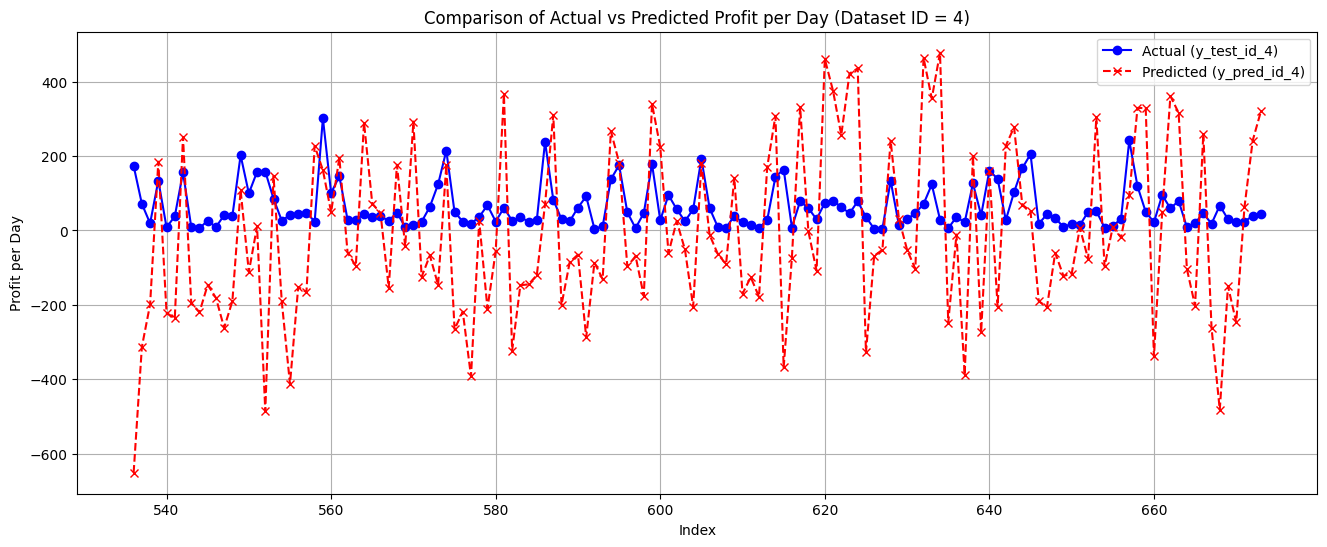

In [ ]:
X_test_id_4 = X_test_full[X_test_full['Dataset_ID'] == 4]
y_test_id_4 = y_test_full[X_test_full['Dataset_ID'] == 4]

y_pred_id_4 = model.predict(X_test_id_4)

plt.figure(figsize=figsize)
plt.plot(y_test_id_4.index, y_test_id_4, label='Actual (y_test_id_4)', color='blue', linestyle='-', marker='o')
plt.plot(y_test_id_4.index, y_pred_id_4, label='Predicted (y_pred_id_4)', color='red', linestyle='--', marker='x')

plt.title('Comparison of Actual vs Predicted Profit per Day (Dataset ID = 4)')
plt.xlabel('Index')
plt.ylabel('Profit per Day')
plt.legend()
plt.grid(True)
plt.show()

## XGBoost

In [ ]:
import xgboost as XGBRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
for df in [X_train_full, X_test_full]:
    df['Date'] = df['Date'].astype('int64') // 10**9

In [ ]:
X_train_full['Median_Quantity']

0         2.0
1         3.0
2         2.0
3         1.0
4         1.0
         ... 
19476    31.0
19477    38.0
19478    39.0
19479    25.0
19480    23.0
Name: Median_Quantity, Length: 19481, dtype: float64

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=10000,
    learning_rate=0.01,
    max_depth=12,    
    subsample=0.3,
    colsample_bytree=0.9,
)

eval_set = [(X_train_full, y_train_full), (X_test_full, y_test_full)]
model.fit(
    X_train_full,
    y_train_full,
    eval_set=eval_set,
    # eval_metric="mae",
    # early_stopping_rounds=10,
    verbose=100
)


[0]	validation_0-rmse:33484.52733	validation_1-rmse:51691.53291
[100]	validation_0-rmse:14305.95788	validation_1-rmse:26907.47504
[200]	validation_0-rmse:7424.18054	validation_1-rmse:18110.96794
[300]	validation_0-rmse:4847.62841	validation_1-rmse:14618.31373
[400]	validation_0-rmse:3635.68923	validation_1-rmse:12499.66870
[500]	validation_0-rmse:2968.98901	validation_1-rmse:11406.50156
[600]	validation_0-rmse:2509.52944	validation_1-rmse:10646.70400
[700]	validation_0-rmse:2149.74957	validation_1-rmse:10128.01866
[800]	validation_0-rmse:1861.97069	validation_1-rmse:9709.05774
[900]	validation_0-rmse:1598.65804	validation_1-rmse:9399.74696
[1000]	validation_0-rmse:1426.25200	validation_1-rmse:9211.82348
[1100]	validation_0-rmse:1273.24853	validation_1-rmse:9041.20992
[1200]	validation_0-rmse:1112.68099	validation_1-rmse:8871.29431
[1300]	validation_0-rmse:988.86438	validation_1-rmse:8768.05536
[1400]	validation_0-rmse:859.51853	validation_1-rmse:8643.01284
[1500]	validation_0-rmse:775.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
figsize=(16, 6)

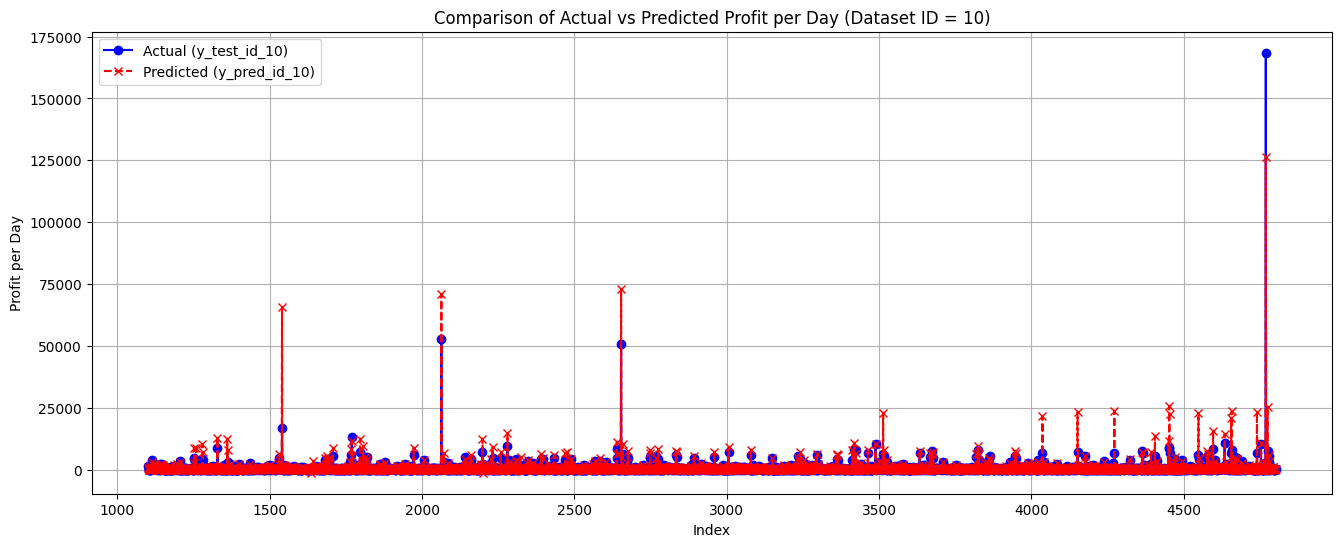

In [ ]:
import matplotlib.pyplot as plt
id = 10

X_test_id = X_test_full[X_test_full['Dataset_ID'] == id]
y_test_id = y_test_full[X_test_full['Dataset_ID'] == id]
y_pred_id = model.predict(X_test_id)
plt.figure(figsize=figsize)
plt.plot(y_test_id.index, y_test_id, label=f'Actual (y_test_id_{id})', color='blue', linestyle='-', marker='o')
plt.plot(y_test_id.index, y_pred_id, label=f'Predicted (y_pred_id_{id})', color='red', linestyle='--', marker='x')
plt.title(f'Comparison of Actual vs Predicted Profit per Day (Dataset ID = {id})')
plt.xlabel('Index')
plt.ylabel('Profit per Day')
plt.legend()
plt.grid(True)
plt.show()


## XGBoost For Single Column Prediction

In [ ]:
def predictSingleColumnTierOne(df):
    col = df.columns
    
    for i in range(len(col)):
        if not ('Date' in col[i]):
            target_col = col[i]
    
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df['Month'] = pd.to_datetime(df['Date']).dt.month
    df['Day'] = pd.to_datetime(df['Date']).dt.day
    df['Is_Weekend'] = pd.to_datetime(df['Date']).dt.weekday >= 5
    df['Date'] = df['Date'].astype('int64') // 10**9
    
    split_index = int(0.8 * len(df))   
    
    train, test = df.iloc[:split_index], df.iloc[split_index:]
    
    X_train = train.drop(columns=[target_col])
    y_train = train[target_col]
    X_test = test.drop(columns=[target_col])
    y_test = test[target_col]
    
    
    modelSingleColumn = XGBRegressor(
        n_estimators=1000,
        learning_rate=0.005,
        max_depth=12,
        subsample=0.8,
        colsample_bytree=0.9,
    )

    eval_set = [(X_train, y_train), (X_test, y_test)]
    modelSingleColumn.fit(
        X_train,
        y_train,
        eval_set=eval_set,
        verbose=False
    )
    
    return modelSingleColumn

In [ ]:
def predictSingleColumnTierTwo(df, target):
    
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df['Month'] = pd.to_datetime(df['Date']).dt.month
    df['Day'] = pd.to_datetime(df['Date']).dt.day
    df['Is_Weekend'] = pd.to_datetime(df['Date']).dt.weekday >= 5
    df['Date'] = df['Date'].astype('int64') // 10**9
    
    split_index = int(0.8 * len(df))   
    
    train, test = df.iloc[:split_index], df.iloc[split_index:]
    
    X_train = train.drop(columns=[target])
    y_train = train[target]
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    
    modelSingleColumn = XGBRegressor(
        n_estimators=1000,
        learning_rate=0.005,
        max_depth=12,
        subsample=0.8,
        colsample_bytree=0.9,
    )

    eval_set = [(X_train, y_train), (X_test, y_test)]
    modelSingleColumn.fit(
        X_train,
        y_train,
        eval_set=eval_set,
        verbose=False
    )
    
    return modelSingleColumn

# Test for Another Dataset


In [ ]:
df = readDataSet("test dataset.xlsx")

In [ ]:
df = clean_and_standardize_data(df)

C:\Users\ipung\AppData\Local\Temp\ipykernel_36588\1429725957.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str)
C:\Users\ipung\AppData\Local\Temp\ipykernel_36588\1429725957.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col])
C:\Users\ipung\AppData\Local\Temp\ipykernel_36588\1429725957.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
df = process_aggregated_data(df)

C:\Users\ipung\AppData\Local\Temp\ipykernel_36588\470132808.py:91: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  additional_features = df.groupby('TEMP DATE').apply(calculate_additional_features).reset_index()


In [ ]:
main_column = ['Total_Transactions', 'Total_Products', 'Highest_Price', 'Median_Price', 'Lowest_Price', 'Total_Quantity', 'Highest_Quantity_Product', 'Lowest_Quantity_Product', 'Median_Quantity']

In [ ]:
secondary_column = ['Second_Highest_Price', 'Second_Lowest_Price', 'Mean_Quantity_Per_Transaction', 'Second_Highest_Quantity', 'Second_Lowest_Quantity', 'Total_Quantity_Highest_Price', 'Total_Quantity_Lowest_Price', 'Total_Quantity_Second_Highest_Price', 'Total_Quantity_Second_Lowest_Price', 'Total_Quantity_Median_Price', 'Price_Highest_Quantity', 'Price_Lowest_Quantity', 'Price_Second_Highest_Quantity', 'Price_Second_Lowest_Quantity', 'Price_Median_Quantity']

In [ ]:
df1 = df[['Date', 'Total_Products']]

In [ ]:
df1

,Date,Total_Products
0,2024-01-01,9
1,2024-01-02,10
2,2024-01-03,10
3,2024-01-04,9
4,2024-01-05,9
...,...,...
360,2024-12-26,9
361,2024-12-27,9
362,2024-12-28,10
363,2024-12-29,10


In [ ]:
listModelTierOne = []

In [ ]:
listModelTierTwo = []

In [ ]:
for col in main_column:
    listModelTierOne = predictSingleColumnTierOne(df[['Date', col]])

C:\Users\ipung\AppData\Local\Temp\ipykernel_36588\3721738011.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Date']).dt.year
C:\Users\ipung\AppData\Local\Temp\ipykernel_36588\3721738011.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = pd.to_datetime(df['Date']).dt.month
C:\Users\ipung\AppData\Local\Temp\ipykernel_36588\3721738011.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c